In [ ]:
#######################################################################################################################
# Project: Deep Virtual Rapport Agent (data analysis)
#
#     Jan Ondras (jo951030@gmail.com)
#     Institute for Creative Technologies, University of Southern California
#     April-October 2019
#
#######################################################################################################################
# Analysis and statistics of the nvb dataset
#######################################################################################################################

In [1]:
#######################################################################################################################
# Get histograms of head gesture durations
#######################################################################################################################

import glob     # Import glob to easily loop over files
import pympi    # Import pympi to work with elan files
from collections import defaultdict

hgs = defaultdict(list)

tier_names = {
    'nod': 'Head Nod', 
    'shake': 'Head Shake', 
    'tilt': 'Head Tilt'
}

cnt_files = 0

# One with XX FPS
for file_path in glob.glob('./../../datasets/nvb/Annotation_NVB/Lia&Richard_merged_LiaNodSmile/Raw*_Final.eaf'):
        
    cnt_files += 1
    print(file_path)
    
    eafob = pympi.Elan.Eaf(file_path)
    
    for k,v in tier_names.items():
        
        anns = eafob.get_annotation_data_for_tier(v)
        
        for ann in anns:
            hgs[k].append((ann[1] - ann[0])/1000)
        
        print(anns)

print(f'Processed {cnt_files} files')

./../../datasets/nvb/Annotation_NVB/Lia&Richard_merged_LiaNodSmile/Raw40M0_Final.eaf
Parsing unknown version of ELAN spec... This could result in errors...
[(4910, 5710, ''), (10350, 11690, ''), (13910, 14570, ''), (15490, 16110, ''), (17610, 18080, ''), (27260, 27940, ''), (46040, 47050, ''), (68780, 69800, ''), (71120, 72020, ''), (88030, 89660, ''), (101830, 103490, ''), (105440, 105940, ''), (118260, 119160, '')]
[]
[(2300, 3060, ''), (5870, 6640, ''), (14660, 15080, ''), (16970, 17540, ''), (19110, 19650, ''), (23810, 24320, ''), (33150, 33730, ''), (36980, 37860, ''), (42030, 42600, ''), (50670, 51410, ''), (69440, 69990, ''), (86670, 87330, ''), (101980, 102490, '')]
./../../datasets/nvb/Annotation_NVB/Lia&Richard_merged_LiaNodSmile/Raw18M1_Final.eaf
Parsing unknown version of ELAN spec... This could result in errors...
[(5050, 5500, ''), (12330, 12730, ''), (42870, 43570, ''), (47520, 48500, ''), (52916, 53736, '')]
[(48340, 49200, ''), (57850, 58750, '')]
[(100310, 100990, '')

Mean: 1.0312961460446246	 Median: 0.88
Min: 0.27	 Max: 6.15


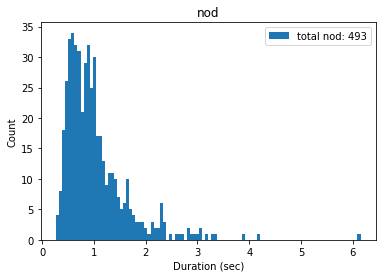

Mean: 0.9662466487935657	 Median: 0.86
Min: 0.3	 Max: 5.06


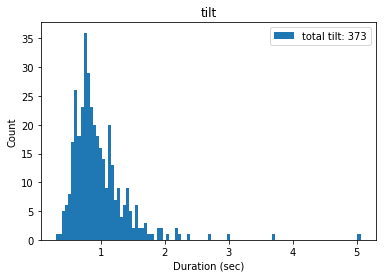

Mean: 1.9053392857142857	 Median: 1.5950000000000002
Min: 0.62	 Max: 7.46


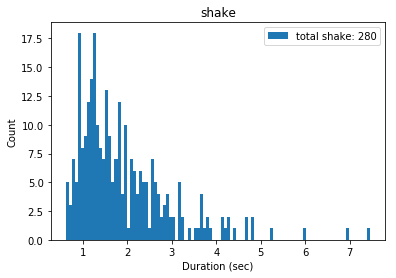

In [3]:
import matplotlib.pyplot as plt
import numpy as np

bins_range = 100

for k in hgs.keys():
    print(f'Mean: {np.mean(hgs[k])}\t Median: {np.median(hgs[k])}')
    print(f'Min: {np.min(hgs[k])}\t Max: {np.max(hgs[k])}')
    # Save all durations for overall stats
    np.savez(f'./gesture_durations/{k}_nvb', durations=hgs[k])
    plt.figure()
    plt.title(k)
    plt.hist(hgs[k], bins=bins_range, label=f'total {k}: {len(hgs[k])}')
    plt.xlabel('Duration (sec)')
    plt.ylabel('Count')
    plt.legend()
    plt.show()


In [5]:
for k in hgs.keys():
    print(f"total duration of {k}: {np.sum(hgs[k])} seconds")

total duration of nod: 508.429 seconds
total duration of tilt: 360.41 seconds
total duration of shake: 533.495 seconds
